# Loan Repayment & Customer Behavior Analysis
By
## Emudiaga Rukevwe Ericson 



## 1. Import Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set()
import sklearn as sk

## 2. Load Data

In [ ]:
loan = pd.read_csv('loans.csv')
loan.head()

In [3]:
loan.describe(include='all')

,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
count,10.00000,10.000000,10,10,10,7,10
unique,NaN,NaN,4,4,5,3,4
top,NaN,NaN,2024-01-10,2024-07-01,₦50000??,12%,repaid
freq,NaN,NaN,6,5,5,4,5
mean,4005.50000,1010.800000,NaN,NaN,NaN,NaN,NaN
std,3.02765,6.908931,NaN,NaN,NaN,NaN,NaN
min,4001.00000,1001.000000,NaN,NaN,NaN,NaN,NaN
25%,4003.25000,1004.250000,NaN,NaN,NaN,NaN,NaN
50%,4005.50000,1011.500000,NaN,NaN,NaN,NaN,NaN
75%,4007.75000,1016.500000,NaN,NaN,NaN,NaN,NaN


In [4]:
loan.columns

Index(['loan_id', 'customer_id', 'issue_date', 'due_date', 'principal_amount',
       'interest_rate', 'status'],
      dtype='object')

## Data Cleaning

In [14]:
loan.shape

(10, 7)

In [6]:
loan=loan.fillna('')
loan

,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
0,4001,1017,2023/09/15,2024/09/15,₦50000??,,repaid
1,4002,1014,2023-07-01,2024-07-01,₦50000??,12%,pending
2,4003,1019,2024-01-10,2024-07-01,₦50000??,12%,active
3,4004,1019,2024-01-10,2024-07-01,"₦100,000",12%,repaid
4,4005,1003,??,2024-07-01,"₦75,000",,repaid
5,4006,1009,??,2024/12/31,?90000,10%,repaid
6,4007,1008,2024-01-10,2024/09/15,₦120000,15%,active
7,4008,1015,2024-01-10,2024-05-10,₦50000??,,default
8,4009,1003,2024-01-10,2024-05-10,₦50000??,15%,repaid
9,4010,1001,2024-01-10,2024-07-01,?90000,12%,pending


In [7]:
loan['principal_amount'] = (
    loan['principal_amount']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)
    .astype(float)
)
loan

,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
0,4001,1017,2023/09/15,2024/09/15,50000.0,,repaid
1,4002,1014,2023-07-01,2024-07-01,50000.0,12%,pending
2,4003,1019,2024-01-10,2024-07-01,50000.0,12%,active
3,4004,1019,2024-01-10,2024-07-01,100000.0,12%,repaid
4,4005,1003,??,2024-07-01,75000.0,,repaid
5,4006,1009,??,2024/12/31,90000.0,10%,repaid
6,4007,1008,2024-01-10,2024/09/15,120000.0,15%,active
7,4008,1015,2024-01-10,2024-05-10,50000.0,,default
8,4009,1003,2024-01-10,2024-05-10,50000.0,15%,repaid
9,4010,1001,2024-01-10,2024-07-01,90000.0,12%,pending


In [8]:
loan['issue_date']=(
    loan['issue_date']
    .astype(str)
    .str.replace(r'[^0-9]','', regex=True)
)
loan

,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
0,4001,1017,20230915,2024/09/15,50000.0,,repaid
1,4002,1014,20230701,2024-07-01,50000.0,12%,pending
2,4003,1019,20240110,2024-07-01,50000.0,12%,active
3,4004,1019,20240110,2024-07-01,100000.0,12%,repaid
4,4005,1003,,2024-07-01,75000.0,,repaid
5,4006,1009,,2024/12/31,90000.0,10%,repaid
6,4007,1008,20240110,2024/09/15,120000.0,15%,active
7,4008,1015,20240110,2024-05-10,50000.0,,default
8,4009,1003,20240110,2024-05-10,50000.0,15%,repaid
9,4010,1001,20240110,2024-07-01,90000.0,12%,pending


In [9]:
loan['due_date']=(
    loan['due_date']
    .astype(str)
    .str.replace(r'[^0-9]','', regex=True)
)
loan

,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
0,4001,1017,20230915,20240915,50000.0,,repaid
1,4002,1014,20230701,20240701,50000.0,12%,pending
2,4003,1019,20240110,20240701,50000.0,12%,active
3,4004,1019,20240110,20240701,100000.0,12%,repaid
4,4005,1003,,20240701,75000.0,,repaid
5,4006,1009,,20241231,90000.0,10%,repaid
6,4007,1008,20240110,20240915,120000.0,15%,active
7,4008,1015,20240110,20240510,50000.0,,default
8,4009,1003,20240110,20240510,50000.0,15%,repaid
9,4010,1001,20240110,20240701,90000.0,12%,pending


In [10]:
loan['issue_date'] = pd.to_datetime(loan['issue_date'], format='%Y%m%d')
loan['due_date'] = pd.to_datetime(loan['due_date'], format='%Y%m%d')
loan

,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
0,4001,1017,2023-09-15,2024-09-15,50000.0,,repaid
1,4002,1014,2023-07-01,2024-07-01,50000.0,12%,pending
2,4003,1019,2024-01-10,2024-07-01,50000.0,12%,active
3,4004,1019,2024-01-10,2024-07-01,100000.0,12%,repaid
4,4005,1003,NaT,2024-07-01,75000.0,,repaid
5,4006,1009,NaT,2024-12-31,90000.0,10%,repaid
6,4007,1008,2024-01-10,2024-09-15,120000.0,15%,active
7,4008,1015,2024-01-10,2024-05-10,50000.0,,default
8,4009,1003,2024-01-10,2024-05-10,50000.0,15%,repaid
9,4010,1001,2024-01-10,2024-07-01,90000.0,12%,pending


In [11]:
loan['interest_rate']=loan['interest_rate'].replace('',12)

loan


,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
0,4001,1017,2023-09-15,2024-09-15,50000.0,12,repaid
1,4002,1014,2023-07-01,2024-07-01,50000.0,12%,pending
2,4003,1019,2024-01-10,2024-07-01,50000.0,12%,active
3,4004,1019,2024-01-10,2024-07-01,100000.0,12%,repaid
4,4005,1003,NaT,2024-07-01,75000.0,12,repaid
5,4006,1009,NaT,2024-12-31,90000.0,10%,repaid
6,4007,1008,2024-01-10,2024-09-15,120000.0,15%,active
7,4008,1015,2024-01-10,2024-05-10,50000.0,12,default
8,4009,1003,2024-01-10,2024-05-10,50000.0,15%,repaid
9,4010,1001,2024-01-10,2024-07-01,90000.0,12%,pending


In [12]:
loan['issue_date'] = loan['issue_date'].fillna(method='bfill')

loan

C:\Users\HELLO\AppData\Local\Temp\ipykernel_5912\1044377828.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  loan['issue_date'] = loan['issue_date'].fillna(method='bfill')


,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
0,4001,1017,2023-09-15,2024-09-15,50000.0,12,repaid
1,4002,1014,2023-07-01,2024-07-01,50000.0,12%,pending
2,4003,1019,2024-01-10,2024-07-01,50000.0,12%,active
3,4004,1019,2024-01-10,2024-07-01,100000.0,12%,repaid
4,4005,1003,2024-01-10,2024-07-01,75000.0,12,repaid
5,4006,1009,2024-01-10,2024-12-31,90000.0,10%,repaid
6,4007,1008,2024-01-10,2024-09-15,120000.0,15%,active
7,4008,1015,2024-01-10,2024-05-10,50000.0,12,default
8,4009,1003,2024-01-10,2024-05-10,50000.0,15%,repaid
9,4010,1001,2024-01-10,2024-07-01,90000.0,12%,pending


In [25]:
loan['interest_rate']=loan['interest_rate'].astype(str).str.replace('%','', regex=True).astype(float)
loan

,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
0,4001,1017,2023-09-15,2024-09-15,50000.0,12.0,repaid
1,4002,1014,2023-07-01,2024-07-01,50000.0,12.0,pending
2,4003,1019,2024-01-10,2024-07-01,50000.0,12.0,active
3,4004,1019,2024-01-10,2024-07-01,100000.0,12.0,repaid
4,4005,1003,2024-01-10,2024-07-01,75000.0,12.0,repaid
5,4006,1009,2024-01-10,2024-12-31,90000.0,10.0,repaid
6,4007,1008,2024-01-10,2024-09-15,120000.0,15.0,active
7,4008,1015,2024-01-10,2024-05-10,50000.0,12.0,default
8,4009,1003,2024-01-10,2024-05-10,50000.0,15.0,repaid
9,4010,1001,2024-01-10,2024-07-01,90000.0,12.0,pending


In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   loan_id           10 non-null     int64         
 1   customer_id       10 non-null     int64         
 2   issue_date        10 non-null     datetime64[ns]
 3   due_date          10 non-null     datetime64[ns]
 4   principal_amount  10 non-null     float64       
 5   interest_rate     10 non-null     float64       
 6   status            10 non-null     object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 692.0+ bytes


In [28]:
loan.to_csv("clean_loan.csv")

In [41]:
accounts=pd.read_csv("accounts.csv")
accounts

,account_id,customer_id,account_type,open_date,balance
0,2001,1017,CUR,2020-03-01,₦70000
1,2002,1002,CUR,2021/04/12,40000@
2,2003,1012,saving,2022-06-09,40000@
3,2004,1003,CUR,2020-03-01,₦70000
4,2005,1017,Savings,2020-03-01,?30000
5,2006,1016,Loan,2021/04/12,40000@
6,2007,1020,Current,2019-11-15,40000@
7,2008,1003,Savings,2022-06-09,₦70000
8,2009,1018,Current,2020-03-01,₦70000
9,2010,1005,saving,2022-06-09,"₦12,000"


In [43]:
accounts['balance']=accounts['balance'].astype(str).str.replace(r'[^0-9.]','',regex=True).replace('',np.nan).astype(float)
accounts

,account_id,customer_id,account_type,open_date,balance
0,2001,1017,CUR,20200301,70000.0
1,2002,1002,CUR,20210412,40000.0
2,2003,1012,saving,20220609,40000.0
3,2004,1003,CUR,20200301,70000.0
4,2005,1017,Savings,20200301,30000.0
5,2006,1016,Loan,20210412,40000.0
6,2007,1020,Current,20191115,40000.0
7,2008,1003,Savings,20220609,70000.0
8,2009,1018,Current,20200301,70000.0
9,2010,1005,saving,20220609,12000.0


In [44]:
accounts['open_date']=accounts['open_date'].astype(str).str.replace(r'[^0-9.]','',regex=True).replace('',np.nan)
accounts

,account_id,customer_id,account_type,open_date,balance
0,2001,1017,CUR,20200301,70000.0
1,2002,1002,CUR,20210412,40000.0
2,2003,1012,saving,20220609,40000.0
3,2004,1003,CUR,20200301,70000.0
4,2005,1017,Savings,20200301,30000.0
5,2006,1016,Loan,20210412,40000.0
6,2007,1020,Current,20191115,40000.0
7,2008,1003,Savings,20220609,70000.0
8,2009,1018,Current,20200301,70000.0
9,2010,1005,saving,20220609,12000.0


In [54]:
accounts['open_date']=pd.to_datetime(accounts['open_date'], format='%Y%m%d')
accounts['open_date']=accounts['open_date'].fillna(method="bfill")
accounts.head()

C:\Users\HELLO\AppData\Local\Temp\ipykernel_5912\443638161.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  accounts['open_date']=accounts['open_date'].fillna(method="bfill")


,account_id,customer_id,account_type,open_date,balance
0,2001,1017,CUR,2020-03-01,70000.0
1,2002,1002,CUR,2021-04-12,40000.0
2,2003,1012,saving,2022-06-09,40000.0
3,2004,1003,CUR,2020-03-01,70000.0
4,2005,1017,Savings,2020-03-01,30000.0


In [58]:
accounts['account_type']=accounts['account_type'].replace('current','c')
accounts['account_type']=accounts['account_type'].replace('Current','c')
accounts['account_type']=accounts['account_type'].replace('CUR','c')
accounts['account_type']=accounts['account_type'].replace('c','current')
accounts['account_type']=accounts['account_type'].replace('saving','s')
accounts['account_type']=accounts['account_type'].replace('Savings','s')
accounts['account_type']=accounts['account_type'].replace('SA','s')
accounts['account_type']=accounts['account_type'].replace('s','savings')
accounts

,account_id,customer_id,account_type,open_date,balance
0,2001,1017,current,2020-03-01,70000.0
1,2002,1002,current,2021-04-12,40000.0
2,2003,1012,savings,2022-06-09,40000.0
3,2004,1003,current,2020-03-01,70000.0
4,2005,1017,savings,2020-03-01,30000.0
5,2006,1016,Loan,2021-04-12,40000.0
6,2007,1020,current,2019-11-15,40000.0
7,2008,1003,savings,2022-06-09,70000.0
8,2009,1018,current,2020-03-01,70000.0
9,2010,1005,savings,2022-06-09,12000.0


In [60]:
accounts['balance']=accounts['balance'].interpolate(method='linear')
accounts

,account_id,customer_id,account_type,open_date,balance
0,2001,1017,current,2020-03-01,70000.0
1,2002,1002,current,2021-04-12,40000.0
2,2003,1012,savings,2022-06-09,40000.0
3,2004,1003,current,2020-03-01,70000.0
4,2005,1017,savings,2020-03-01,30000.0
5,2006,1016,Loan,2021-04-12,40000.0
6,2007,1020,current,2019-11-15,40000.0
7,2008,1003,savings,2022-06-09,70000.0
8,2009,1018,current,2020-03-01,70000.0
9,2010,1005,savings,2022-06-09,12000.0


In [65]:
accounts.to_csv("accounts_clean.csv")

In [67]:
customers=pd.read_csv("customers.csv")
customers.head()

,customer_id,first_name,last_name,gender,dob,state,email,join_date
0,1001,John,Doe,Female,1989-04-12,Edo,user0@mail@mail,2020/03/01
1,1002,Mary,O?baje,Unknown,1995-12-02,Delta,user1@mail@gmail,2021/02/20
2,1003,Danladi,Danladi,Female,1988-03-?,Lagos,user2@mail@mail,2020/03/01
3,1004,Grace,Ade,F,19??-10-11,Kaduna,user3@mail@gmail,2021/02/20
4,1005,Chioma,Chuks,Female,19??-10-11,Enugu,user4@mail.com,2022-??-??


In [73]:
customers['first_name']=customers['first_name'].str.replace(r'[^A-Za-z]','', regex=True)
customers['last_name']=customers['last_name'].str.replace(r'[^A-Za-z]','', regex=True)
customers['gender']=customers['gender'].replace('F','Female')

customers

,customer_id,first_name,last_name,gender,dob,state,email,join_date
0,1001,John,Doe,Female,1989-04-12,Edo,user0@mail@mail,2020/03/01
1,1002,Mary,Obaje,Unknown,1995-12-02,Delta,user1@mail@gmail,2021/02/20
2,1003,Danladi,Danladi,Female,1988-03-?,Lagos,user2@mail@mail,2020/03/01
3,1004,Grace,Ade,Female,19??-10-11,Kaduna,user3@mail@gmail,2021/02/20
4,1005,Chioma,Chuks,Female,19??-10-11,Enugu,user4@mail.com,2022-??-??
5,1006,Ahmed,Bello,Male,1994/11/23,Lagos,user5@mail.com,2022-??-??
6,1007,Bola,Ade,Male,1995-12-02,Edo,user6@mail@mail,2019-11-15
7,1008,Ruth,Ebi,Male,1991-09-09,Delta,user7@mail@gmail,2020/03/01
8,1009,Tunde,Taiwo,Unknown,1995-12-02,Enugu,user8@mail@gmail,2023/05/12
9,1010,Ngozi,Okon,Unknown,1985-07-01,Enugu,user9@mail@mail,2019-11-15


# Treating dates with inconsistent entries

In [90]:
customers['join_date']=customers['join_date'].replace(r'[^0-9]', '', regex=True)
customers['join_date']=pd.to_datetime(customers['join_date'], errors='coerce')
customers

,customer_id,first_name,last_name,gender,dob,state,email,join_date
0,1001,John,Doe,Female,NaN,Edo,user0@mail@mail,2020-03-01
1,1002,Mary,Obaje,Unknown,NaN,Delta,user1@mail@gmail,2021-02-20
2,1003,Danladi,Danladi,Female,NaN,Lagos,user2@mail@mail,2020-03-01
3,1004,Grace,Ade,Female,NaN,Kaduna,user3@mail@gmail,2021-02-20
4,1005,Chioma,Chuks,Female,NaN,Enugu,user4@mail.com,NaT
5,1006,Ahmed,Bello,Male,NaN,Lagos,user5@mail.com,NaT
6,1007,Bola,Ade,Male,NaN,Edo,user6@mail@mail,2019-11-15
7,1008,Ruth,Ebi,Male,NaN,Delta,user7@mail@gmail,2020-03-01
8,1009,Tunde,Taiwo,Unknown,NaN,Enugu,user8@mail@gmail,2023-05-12
9,1010,Ngozi,Okon,Unknown,NaN,Enugu,user9@mail@mail,2019-11-15


In [94]:
customers.to_csv("clean_customer.csv")
customers.head()

,customer_id,first_name,last_name,gender,dob,state,email,join_date
0,1001,John,Doe,Female,NaN,Edo,user0@mail@mail,2020-03-01
1,1002,Mary,Obaje,Unknown,NaN,Delta,user1@mail@gmail,2021-02-20
2,1003,Danladi,Danladi,Female,NaN,Lagos,user2@mail@mail,2020-03-01
3,1004,Grace,Ade,Female,NaN,Kaduna,user3@mail@gmail,2021-02-20
4,1005,Chioma,Chuks,Female,NaN,Enugu,user4@mail.com,NaT


In [100]:
transactions=pd.read_csv("transactions.csv")
transactions.head()

,transaction_id,account_id,date,type,amount,channel
0,3001,2002,2024-01-14,deposit,3000@,POS
1,3002,2017,2024-01-14,transfer,?1500,USSD
2,3003,2001,2024-03-05,transfer,2000,USSD
3,3004,2008,2024-01-14,deposit,3000@,Mobile
4,3005,2020,2024/02/18,dep@,₦5000,App


In [103]:
transactions['date']=transactions['date'].replace(r'[^0-9]','',regex=True)
transactions['date']=pd.to_datetime(transactions['date'], errors='coerce')
transactions['type'].value_counts()

type
withdrawal    9
deposit       7
transfer      7
WITHDRAW      6
Deposit       6
dep@          5
Name: count, dtype: int64

In [104]:
transactions['type']=transactions['type'].replace(r'WITHDRAW','withdrawal',regex=True)
transactions['type']=transactions['type'].replace(r'Deposit','deposit',regex=True)
transactions['type']=transactions['type'].replace(r'dep@','deposit',regex=True)
transactions['type'].value_counts()

type
deposit       18
withdrawal    15
transfer       7
Name: count, dtype: int64

In [109]:
transactions['amount']=transactions['amount'].astype(str).str.replace(r'[^0-9]','',regex=True).astype(float)
transactions.head()

,transaction_id,account_id,date,type,amount,channel
0,3001,2002,2024-01-14,deposit,3000000.0,POS
1,3002,2017,2024-01-14,transfer,1500000.0,USSD
2,3003,2001,2024-03-05,transfer,2000000.0,USSD
3,3004,2008,2024-01-14,deposit,3000000.0,Mobile
4,3005,2020,2024-02-18,deposit,5000000.0,App


In [132]:
transactions.to_csv("clean_transactions.csv")

## Exploratory Data Analysis

In [20]:
transactions = pd.read_csv("clean_transactions.csv")
accounts = pd.read_csv("accounts_clean.csv")
customers = pd.read_csv("clean_customer.csv")
loans = pd.read_csv("clean_loan.csv")
loans['loan_id']=loans['loan_id'].astype(str)
loans['customer_id']=loans['customer_id'].astype(str)
loans['Unnamed: 0']=loans['Unnamed: 0'].astype(str)


In [10]:
Average_Loan_Amount=loans['principal_amount'].mean()
Average_Loan_Amount

np.float64(72500.0)

## Average Loan amount approved
### 72500

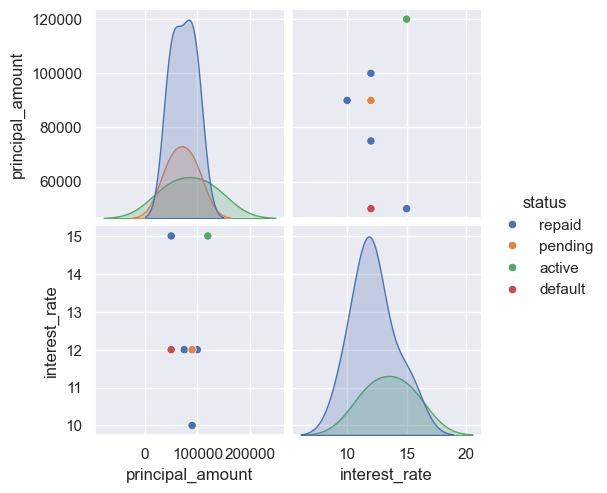

In [22]:
sns.pairplot(loans, hue='status')

AttributeError: module 'matplotlib' has no attribute 'title'

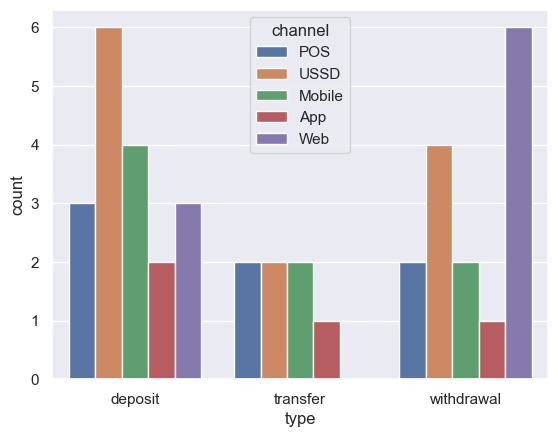

In [120]:
sns.countplot(x='type', hue='channel', data=transactions)

plt.title('Transactions by Type and Channel')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Channel')
plt.show()

In [127]:
transactions.head()

,transaction_id,account_id,date,type,amount,channel
0,3001,2002,2024-01-14,deposit,3000000.0,POS
1,3002,2017,2024-01-14,transfer,1500000.0,USSD
2,3003,2001,2024-03-05,transfer,2000000.0,USSD
3,3004,2008,2024-01-14,deposit,3000000.0,Mobile
4,3005,2020,2024-02-18,deposit,5000000.0,App


In [128]:
accounts.head()

,account_id,customer_id,account_type,open_date,balance
0,2001,1017,current,2020-03-01,70000.0
1,2002,1002,current,2021-04-12,40000.0
2,2003,1012,savings,2022-06-09,40000.0
3,2004,1003,current,2020-03-01,70000.0
4,2005,1017,savings,2020-03-01,30000.0


In [130]:
loan.head()

,loan_id,customer_id,issue_date,due_date,principal_amount,interest_rate,status
0,4001,1017,2023-09-15,2024-09-15,50000.0,12.0,repaid
1,4002,1014,2023-07-01,2024-07-01,50000.0,12.0,pending
2,4003,1019,2024-01-10,2024-07-01,50000.0,12.0,active
3,4004,1019,2024-01-10,2024-07-01,100000.0,12.0,repaid
4,4005,1003,2024-01-10,2024-07-01,75000.0,12.0,repaid


In [131]:
customers.head()

,customer_id,first_name,last_name,gender,dob,state,email,join_date
0,1001,John,Doe,Female,NaN,Edo,user0@mail@mail,2020-03-01
1,1002,Mary,Obaje,Unknown,NaN,Delta,user1@mail@gmail,2021-02-20
2,1003,Danladi,Danladi,Female,NaN,Lagos,user2@mail@mail,2020-03-01
3,1004,Grace,Ade,Female,NaN,Kaduna,user3@mail@gmail,2021-02-20
4,1005,Chioma,Chuks,Female,NaN,Enugu,user4@mail.com,NaT


## Exploratory Data Analysis

# Machine learning analysis to conduct
## Features and Target
### Features
- Gender
- Age using join date
- Interest rate
- Principal amount
- Duration
- Account Balance
### Target
- Loan Status

In [2]:
# Write a loop that prompts the user to enter a series of pizza toppings until they enter a 'quit' value. As they enter each topping,
# print a message saying you’ll add that topping to their pizza.

pizza_toping = "Pizza Toppings to add to your order "
while pizza_toping != 'quit':
    pizza_toping = input(pizza_toping)
    print(f"Noted, i'll add {pizza_toping.title()} to your Pizza order now")
    if pizza_toping == 'quit':
        print("Thank for your patronage")
    
   

Pizza Toppings to add to your order  mushroom


Noted, i'll add Mushroom to your Pizza order now


mushroom Adaboost


Noted, i'll add Adaboost to your Pizza order now


Adaboost quit


Noted, i'll add Quit to your Pizza order now
Thank for your patronage
